# Template Matching
This is the simplest form of object detectione where this just checks if the image is the subset of the second image.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Reading in an image
dog = cv2.imread("/Users/ruben/Desktop/Learning/Computer-Vision-with-Python/DATA/sammy.jpg")
dog_show = cv2.cvtColor(dog,cv2.COLOR_BGR2RGB)

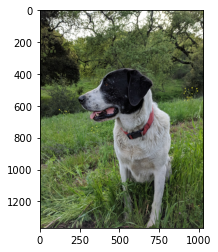

In [3]:
plt.imshow(dog_show)

In [4]:
dog.shape

(1367, 1025, 3)

In [5]:
#Reading in another image with a face of a dog
face = cv2.imread("/Users/ruben/Desktop/Learning/Computer-Vision-with-Python/DATA/sammy_face.jpg")
face_show = cv2.cvtColor(face,cv2.COLOR_BGR2RGB)

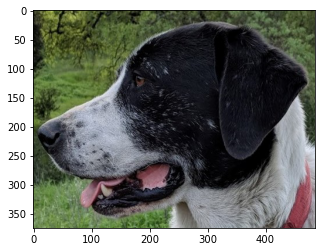

In [6]:
plt.imshow(face_show)

In [7]:
face.shape

(375, 486, 3)

Its interesting to notice that the face image has the exact dimensions as in the original image which defeats the purpose of object detection.

In [8]:
#List of methods of template matching
methods = ['cv2.TM_CCOEFF','cv2.TM_CCOEFF_NORMED','cv2.TM_CCORR_NORMED','cv2.TM_CCORR','cv2.TM_SQDIFF_NORMED','cv2.TM_SQDIFF']

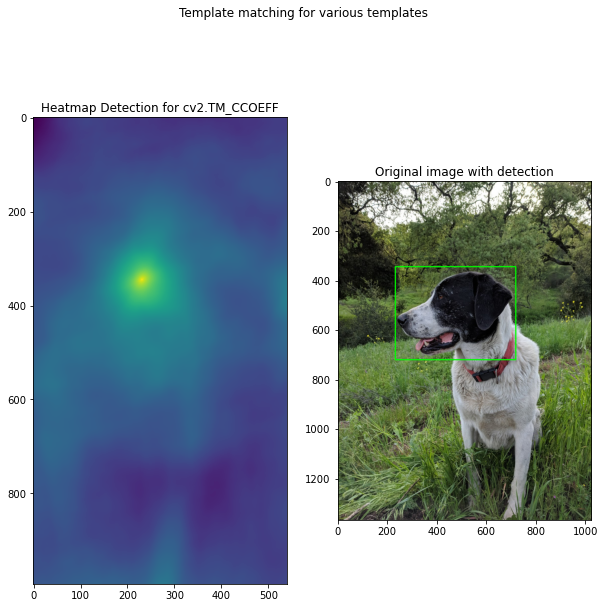

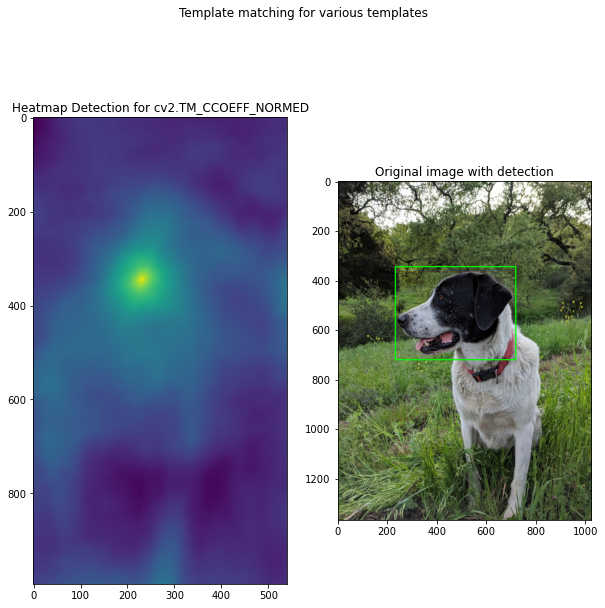

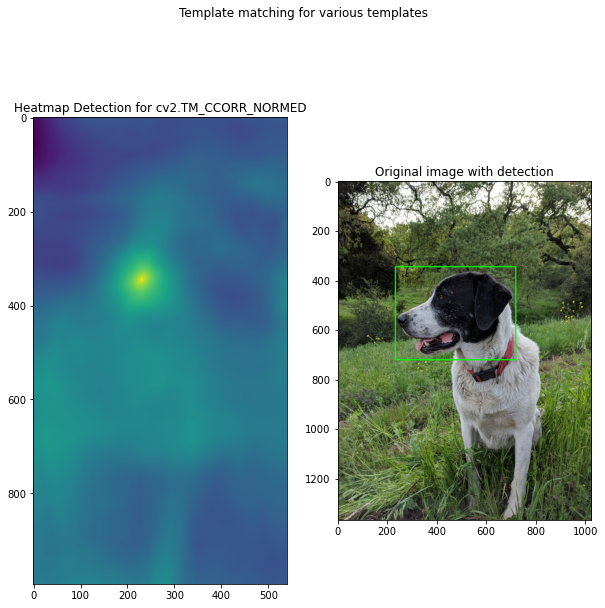

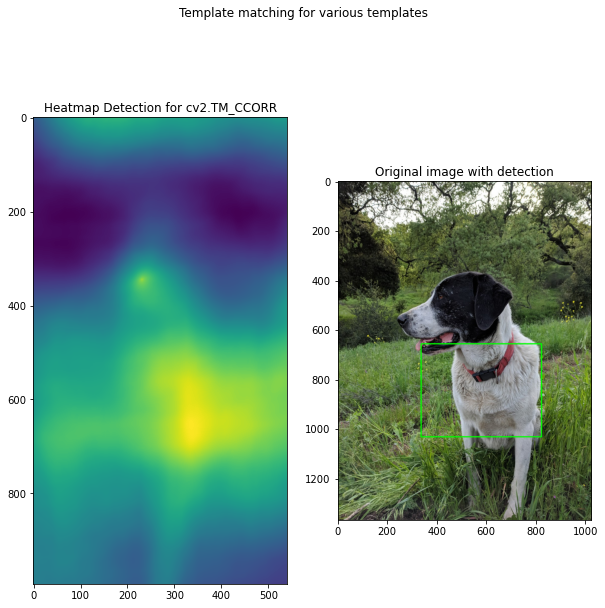

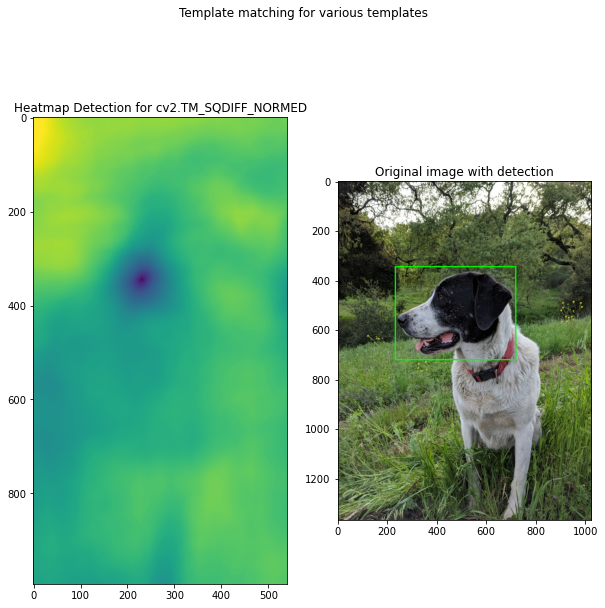

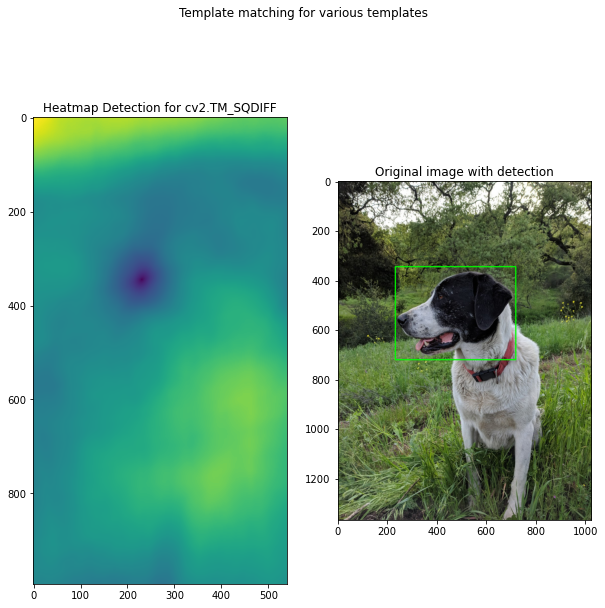

In [9]:
for m in methods:
    image = dog_show.copy()
    method = eval(m)
    
    #Template matching
    res = cv2.matchTemplate(image,face_show,method)
    
    #extract the minimum and maximum location of the area of highest correlation
    min_val,max_val,min_loc,max_loc = cv2.minMaxLoc(res)
    
    #For CV_TM_SQDIFF_NORMED and CV_TM_SQDIFF, they show the minimum value of correlation as max value
    if method in [cv2.TM_SQDIFF_NORMED,cv2.TM_SQDIFF]:
        top_left = min_loc
    else:
        top_left = max_loc
    
    height,width,channels = face_show.shape
    bottom_right = (top_left[0]+width,top_left[1]+height)
    
    cv2.rectangle(image,top_left,bottom_right,(0,255,0),4)
    
    #plot to show images
    plt.figure(figsize=(10,10))
    plt.subplot(121)
    plt.imshow(res)
    plt.title(f"Heatmap Detection for {m}")
    plt.subplot(122)
    plt.imshow(image)
    plt.title("Original image with detection")
    plt.suptitle("Template matching for various templates")
    plt.show()
    print("\n")
    print("\n")

# Corner Detection
Corner Detection as the word says, its the method of finding the square corners from the entire image. There are two techniques used in finding corners.
- Haris corner detection
- Ski Haris corner detection.

In [10]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
chess_layout = cv2.imread('/Users/ruben/Desktop/Learning/Computer-Vision-with-Python/DATA/flat_chessboard.png')
chess_layout = cv2.cvtColor(chess_layout,cv2.COLOR_BGR2RGB)

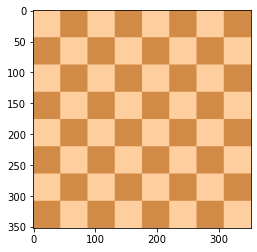

In [12]:
plt.imshow(chess_layout)

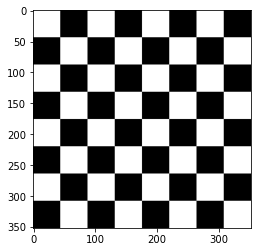

In [13]:
chess_layout_gray = cv2.cvtColor(chess_layout,cv2.COLOR_RGB2GRAY)
plt.imshow(chess_layout_gray,cmap = 'gray')

In [14]:
chess_layout_gray

array([[215, 215, 215, ..., 152, 152, 152],
       [215, 215, 215, ..., 152, 152, 152],
       [215, 215, 215, ..., 152, 152, 152],
       ...,
       [152, 152, 152, ..., 215, 215, 215],
       [152, 152, 152, ..., 215, 215, 215],
       [152, 152, 152, ..., 215, 215, 215]], dtype=uint8)

### Corner Harris Method

We need to convert the pixels into float to perform the harris operation.

In [6]:
chess_layout_gray = np.float32(chess_layout_gray)

In [7]:
#Corner harris detection
result = cv2.cornerHarris(chess_layout_gray,blockSize=5,ksize=3,k=0.04)

In [8]:
#This is for visualisation purpose alone, we use this operator to actively display the corners detections more clearly
result = cv2.dilate(result,None)

In [9]:
#Highlight the points where the result is in the top 1% of the predictions
chess_layout[result>0.01*result.max()] = [255,0,0]

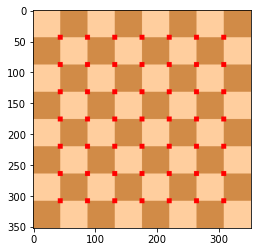

In [10]:
plt.imshow(chess_layout)

We have found that the corners are detected at the middle of the squares. Unfortunately it didnt pick up the squares on the edges. This makes sense as the image of reference doesn't have the outter boundaries in context. Similarly for a complex chessboard image with pieces on it, lets do the same.

In [11]:
real_chess_board = cv2.imread('/Users/ruben/Desktop/Learning/Computer-Vision-with-Python/DATA/real_chessboard.jpg')

In [12]:
real_chess_board = cv2.cvtColor(real_chess_board,cv2.COLOR_BGR2RGB)

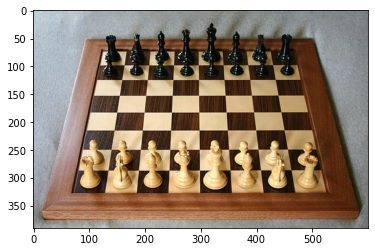

In [13]:
plt.imshow(real_chess_board)

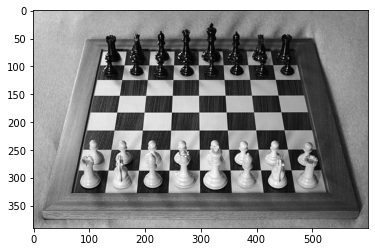

In [14]:
real_chess_board_gray = cv2.cvtColor(real_chess_board,cv2.COLOR_RGB2GRAY)
plt.imshow(real_chess_board_gray,cmap='gray')

In [15]:
real_chess_board_gray = np.float32(real_chess_board_gray)
result = cv2.cornerHarris(real_chess_board_gray,blockSize=5,ksize=3,k=0.04)

In [16]:
result = cv2.dilate(result,None)
real_chess_board[result>0.01*result.max()] = [255,0,0]

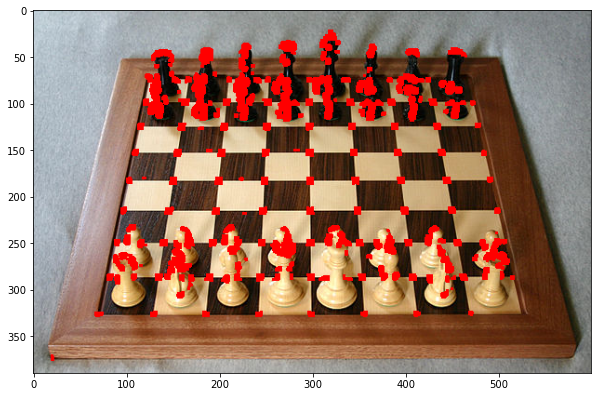

In [17]:
plt.figure(figsize=(10,10))
plt.imshow(real_chess_board)

### Shi-Tomasi Corner Detection Method

In [18]:
flat_chess_board = cv2.imread('/Users/ruben/Desktop/Learning/Computer-Vision-with-Python/DATA/flat_chessboard.png')
flat_chess_board = cv2.cvtColor(chess_layout,cv2.COLOR_BGR2RGB)

real_chess_board = cv2.imread('/Users/ruben/Desktop/Learning/Computer-Vision-with-Python/DATA/real_chessboard.jpg')
real_chess_board = cv2.cvtColor(real_chess_board,cv2.COLOR_BGR2RGB)

gray_flat_board = cv2.cvtColor(flat_chess_board,cv2.COLOR_BGR2GRAY)
gray_real_board =cv2.cvtColor(real_chess_board,cv2.COLOR_BGR2GRAY)

In [19]:
#Shi-tomasi corner detection with maximum number of corners of 5 of quality level above 0.01
corners = cv2.goodFeaturesToTrack(gray_flat_board,5,0.01,10)

In [21]:
#Convert from float type to int
corners = np.int0(corners)

In [22]:
corners

array([[[311, 311]],

       [[260, 311]],

       [[223, 311]],

       [[172, 311]],

       [[135, 311]]])

## Watershed Algorithm
The watershed algorithm is an algorithm that uses the concept of topgraphic watershed feature in order to distinguish peaks as higher intensity colors versus valleys as lower brightness intensity values. If there are two peaks with different color intensities, the colors are bound to merge below. Hence there are external boundaries that ensure that phenomenon does not occur.

In [54]:
def display(img,cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [55]:
img = cv2.imread("/Users/ruben/Desktop/Learning/Computer-Vision-with-Python/DATA/pennies.jpg")

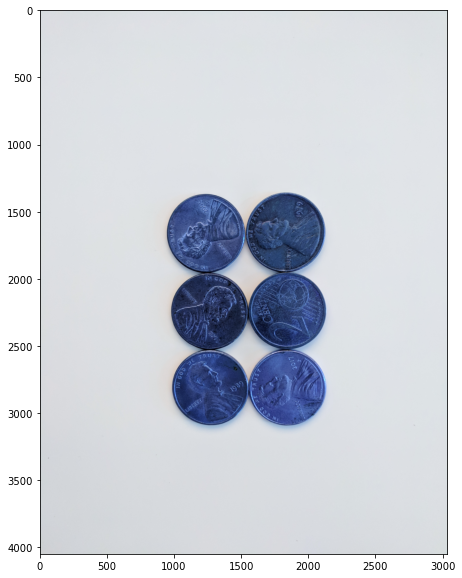

In [56]:
display(img)

Lets try by the regular traditional image processing techniques to see how we are able to segment these various coins on the screen. We first apply median blur to remove the foreground features.

In [31]:
blurred_img = cv2.medianBlur(img,25)

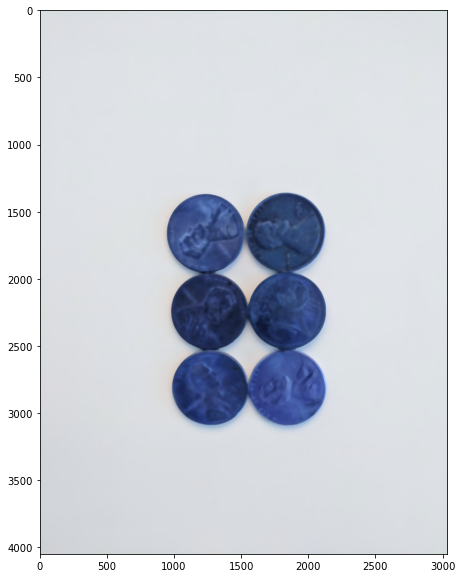

In [32]:
display(blurred_img)

We perform a grayscaling folowed by a binary thresholder to extract the a black and white foreground and background.

In [33]:
b_img_gray = cv2.cvtColor(blurred_img,cv2.COLOR_BGR2GRAY)

In [35]:
ret, thresh_img = cv2.threshold(b_img_gray,166,255,cv2.THRESH_BINARY_INV)

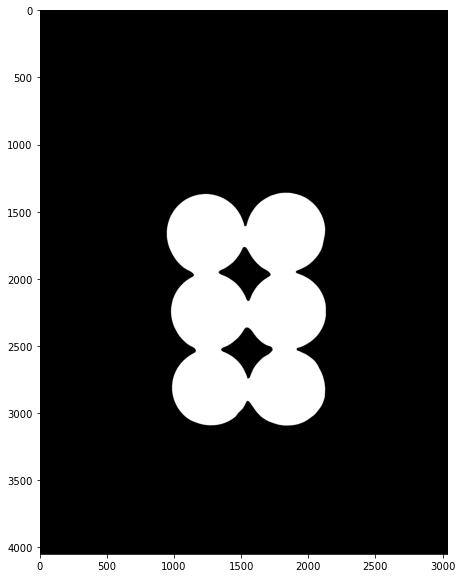

In [36]:
display(thresh_img)

In [45]:
kernel = np.ones((20,15),dtype=np.int16)

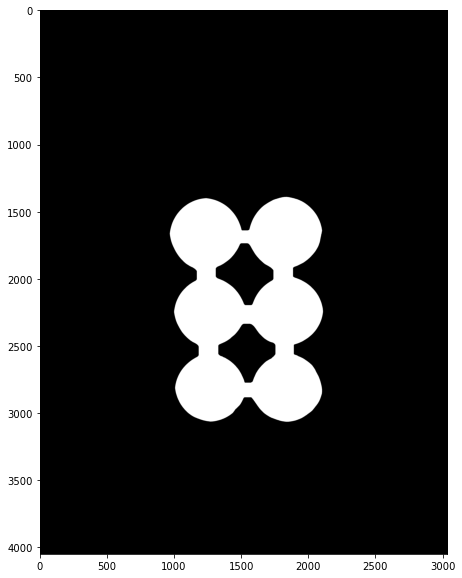

In [46]:
img_erode = cv2.erode(thresh_img,kernel,iterations=3)
display(img_erode)

This isn't an ideal way since this is eroding the diameter of the coins. Sticking to the original image, we find the contours of the image

In [48]:
image, contours, hierarchy = cv2.findContours(thresh_img.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)
img_display = img.copy()
for i in range(len(contours)):
    if hierarchy[0][i][3]== -1:
        cv2.drawContours(img_display,contours,i, (255,0,0),10)

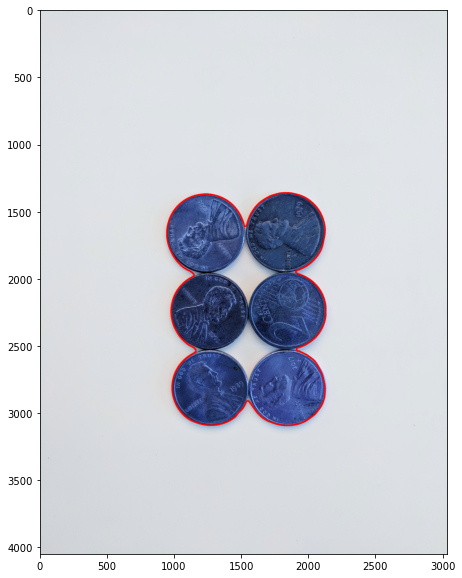

In [49]:
display(img_display)

Even after performing a lot of thresholding and using erosion operator the diameter of the coins have gravely reduced at the cost of trying to erode those connected edges. Hence we would need complex algos to segment them seperately. Enter Le Watershed algo!

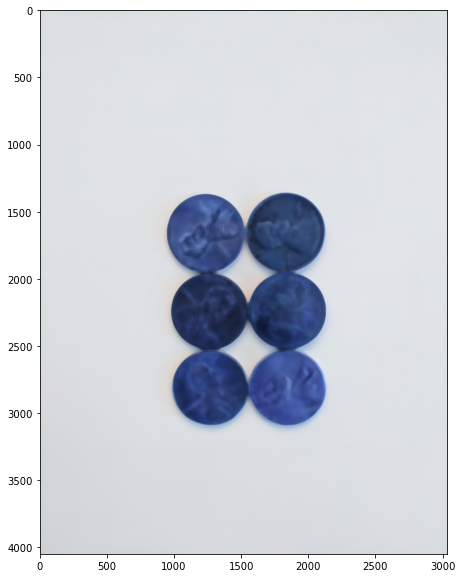

In [60]:
blurred_img = cv2.medianBlur(img,35)
display(blurred_img)

Otsu binarisation helps in finding an optimal threshold automatically and can remove the additional noise on the image. 

In [61]:
#Apply grayscaling and thresholding
gray_img = cv2.cvtColor(blurred_img,cv2.COLOR_BGR2GRAY)
ret , thresh_img = cv2.threshold(gray_img,127,255,cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

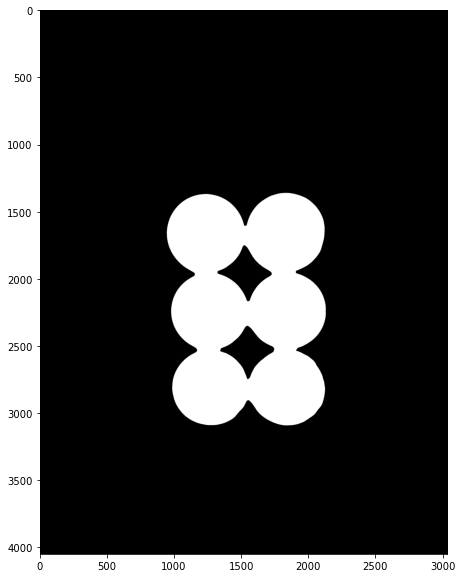

In [62]:
display(thresh_img)

Lets do one more round of preprocessing, we can use the Open operator to clear the edges

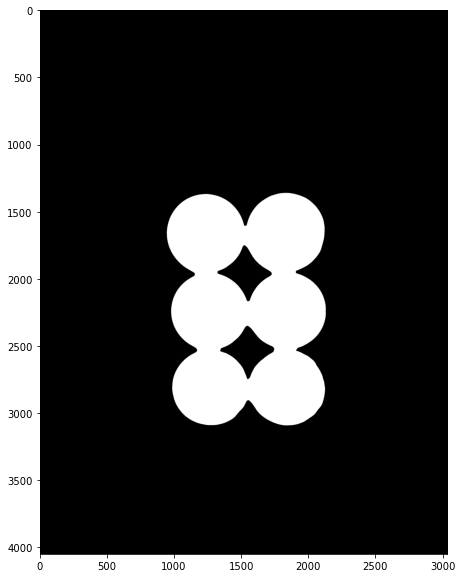

In [63]:
kernel = np.ones((3,3),np.uint8)
open_img = cv2.morphologyEx(thresh_img,cv2.MORPH_OPEN,kernel,iterations=2)
display(open_img)

No difference, nonetheless lets obtain the background of the image from. the foreground.

In [64]:
sure_bg = cv2.dilate(open_img,kernel,iterations=2)

Now in order to apply the watershed algo, we would need the 'seeds' or peaks of different objects of the image. We will use the concept of distance transform which increments values based on the distance away from 0 or dark regions of the image. This helps us get the spine of the object

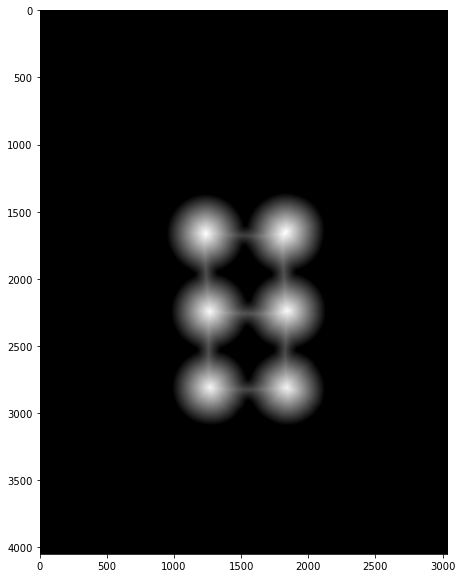

In [65]:
dist_transform = cv2.distanceTransform(open_img,cv2.DIST_L2,5)
display(dist_transform)

Once obtaining the distance transform, lets threshold the values based on 70% of the max value of the transform.

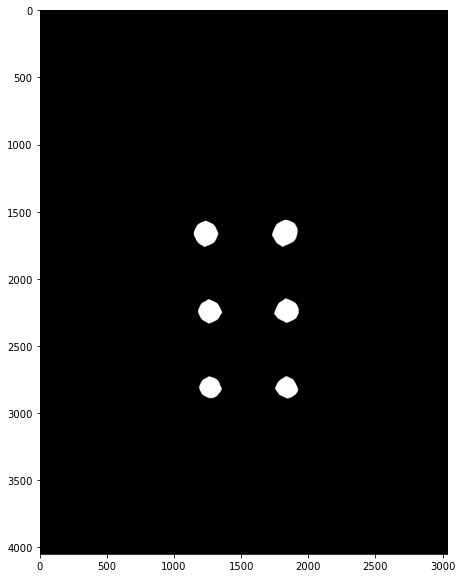

In [70]:
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
display(sure_fg)

In [71]:
sure_fg = np.uint8(sure_fg)

In [73]:
unknown = cv2.subtract(sure_bg,sure_fg)

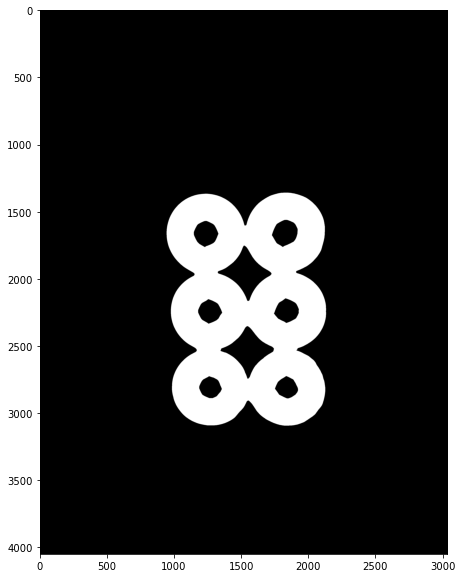

In [74]:
display(unknown)

Now lets start the process of implementing the watershed algo. Lets label the seeds

In [77]:
ret, markers = cv2.connectedComponents(sure_fg)

In [78]:
# adding the value of 1 to the seeds and 0 to the unknown values
markers = markers + 1
markers[unknown==255] = 0

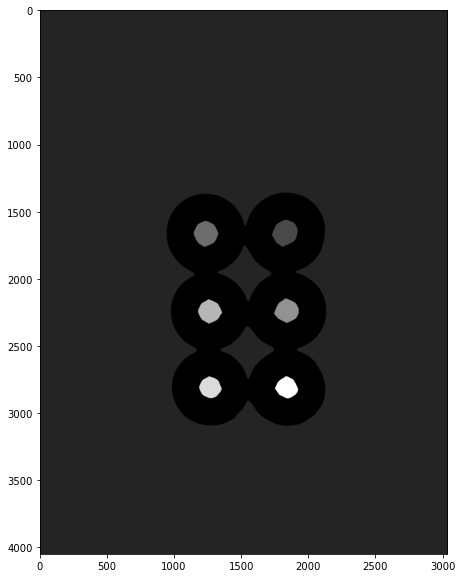

In [82]:
display(markers)

In [85]:
watershed_img = cv2.watershed(img,markers)

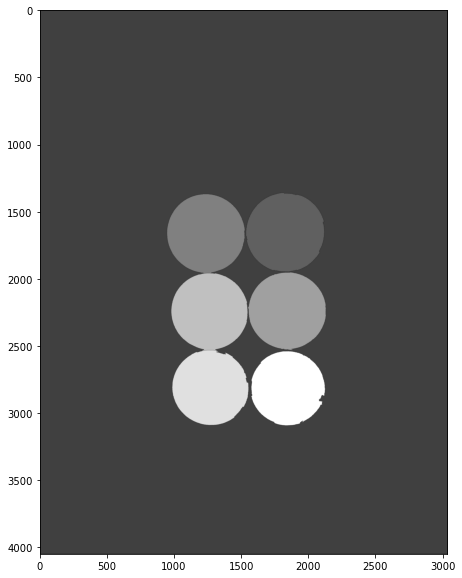

In [86]:
display(watershed_img)

In [87]:
images, contours, hierarchy = cv2.findContours(watershed_img,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)
img_display = img.copy()
for i in range(len(contours)):
    if hierarchy[0][i][3]==-1:
        cv2.drawContours(img_display,contours,i,(255,0,0),10)

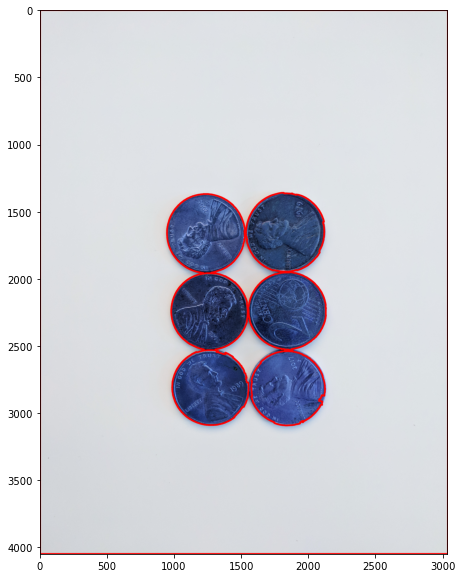

In [88]:
display(img_display)